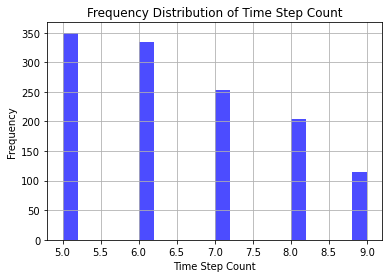

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

read_folder = "/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/20230130_08/20230130_0845_20sec_end162021_under10step"

file_list = os.listdir(read_folder)

nts_list = []

for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(read_folder, file_name)
        df = pd.read_csv(file_path)

        ts1 = df.loc[0, 'timestep']
        last = len(df)
        ts2 = df.loc[last-1, 'timestep']

        nts = ts2 - ts1 + 1

        nts_list.append(nts)

plt.hist(nts_list, bins=20, alpha=0.7, color='blue')
plt.xlabel('Time Step Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Time Step Count')
plt.grid(True)
plt.show()

間隔を20secとすると5,6，7，8，の順に減る．10ステップ以上のサンプルは落として良さそう．ノイズ

In [12]:
!pip install fastdtw

     |████████████████████████████████| 133 kB 6.1 MB/s eta 0:00:01
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp39-cp39-macosx_10_9_x86_64.whl size=88207 sha256=7546e892673f223bd496d2ab2156190f3ed5193d32139849a33993c026b2d150
  Stored in directory: /Users/takahiromatsunaga/Library/Caches/pip/wheels/1f/a1/63/bfd0fddb5bf0b59f564872e29272cee8a2de0cd745d88fede5
Successfully built fastdtw


In [13]:
from fastdtw import fastdtw
import matplotlib.pyplot as plt
# グラフを横長固定（お好みで）
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

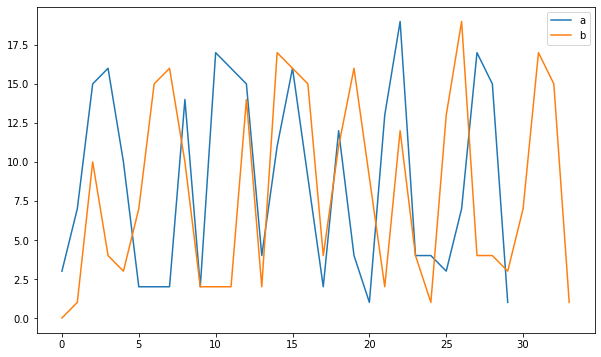

In [20]:
# データ作成
from numpy.random import *
import numpy as np 

seed(100)
rand()

# 0から20の範囲で30個の乱数を生成し、リストaに格納する
a = np.random.randint(0, 20, 30)
a = a.tolist()

# bはaを少しだけずらしたデータにする
b = [0, 1, 10, 4] + a

plt.plot(a, label="a")
plt.plot(b, label="b")
plt.legend()
plt.show()


In [22]:
distance, path = fastdtw(a, b)
distance

13.0